In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("A:\DATA\Innomatics_challenge2\web_app")
df=pd.read_csv("train.csv")
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [3]:
dfp=ProfileReport(df,title="TRAIN")
dfp.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (1278, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
 

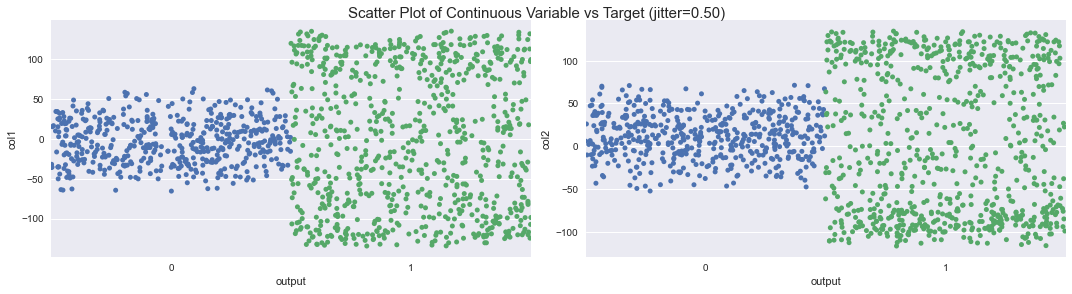

Total Number of Scatter Plots = 3


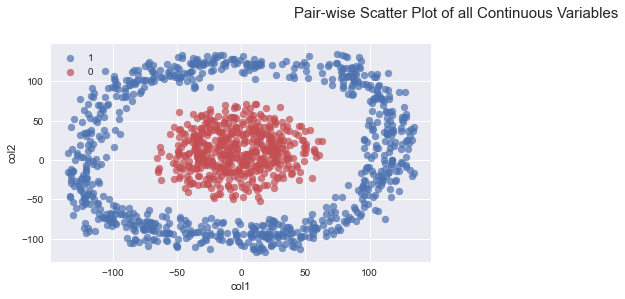

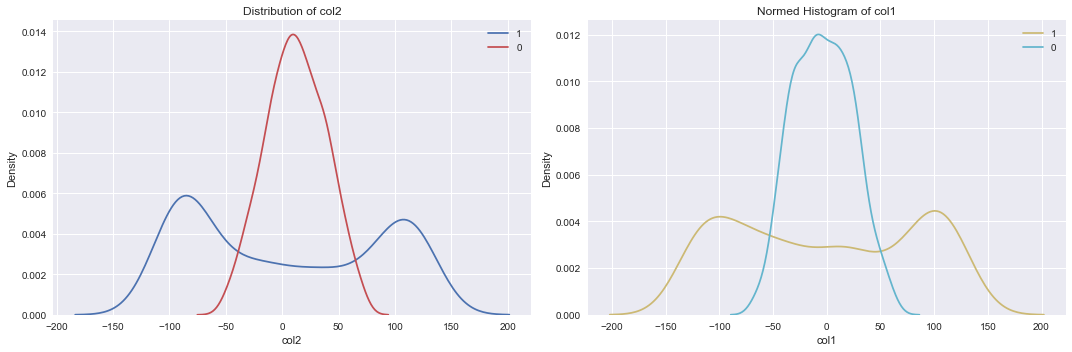

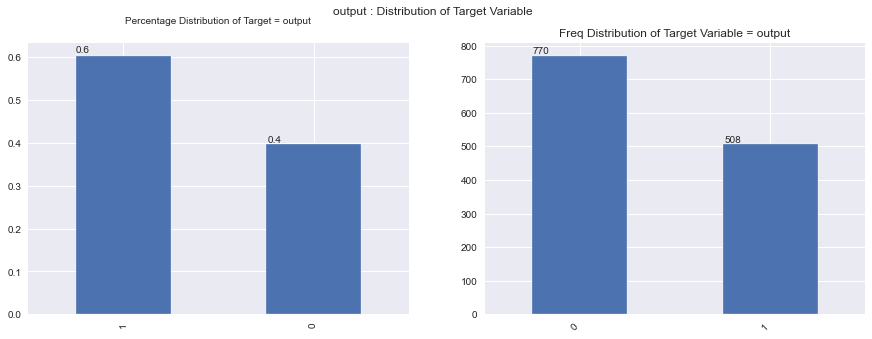

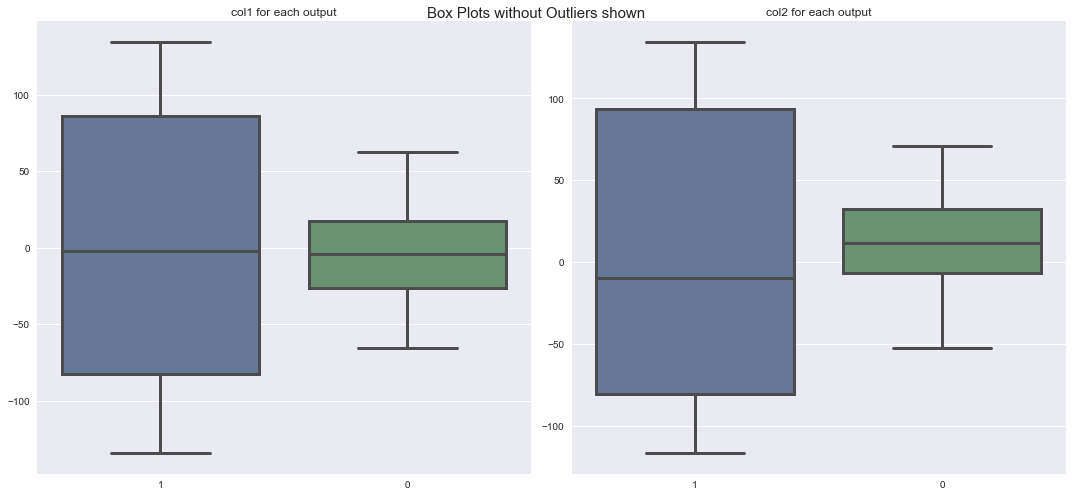

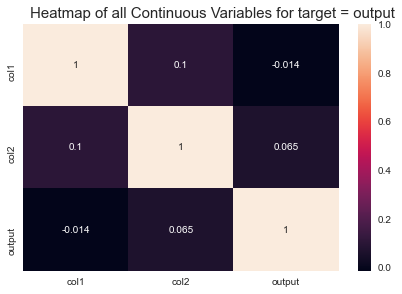

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 1.980

 ###################### VISUALIZATION Completed ########################


In [4]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('train.csv', depVar='output')

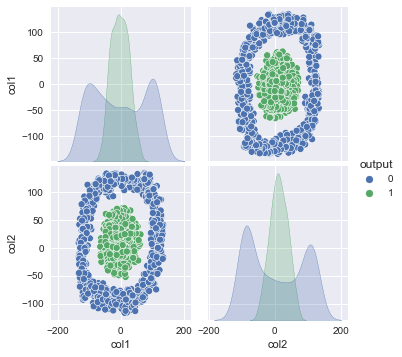

In [5]:
sns.pairplot(df,hue='output')

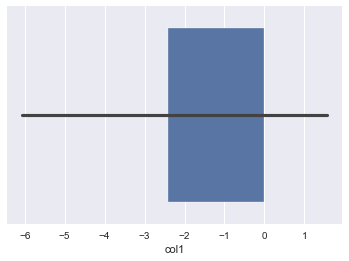

In [6]:
sns.barplot(x='col1', data=df)

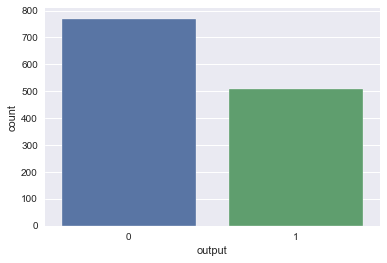

In [7]:
sns.countplot(x='output', data=df)

In [8]:
X=df.drop(["output"],axis = 1)
y=df["output"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((958, 2), (320, 2), (958,), (320,))

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(X_test)

In [15]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.628125

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[201   0]
 [119   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       201
           1       0.00      0.00      0.00       119

    accuracy                           0.63       320
   macro avg       0.31      0.50      0.39       320
weighted avg       0.39      0.63      0.48       320



In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = svc.predict(X_test)

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.628125

In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[201   0]
 [119   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       201
           1       0.00      0.00      0.00       119

    accuracy                           0.63       320
   macro avg       0.31      0.50      0.39       320
weighted avg       0.39      0.63      0.48       320



In [21]:
svcr = SVC(kernel='rbf')
svcr.fit(X_train, y_train)

SVC()

In [22]:
y_pred = svcr.predict(X_test)

In [23]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [24]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[201   0]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       119

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [27]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[201   0]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       119

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [28]:
import pickle

In [29]:
from pickle import dump

dump(svcr, open('A:\DATA\Innomatics_challenge2\web_app\Pickle_lr_Model.pkl', 'wb'))

In [30]:
from pickle import load

In [33]:
def predict(arr):
    classifier = load(open('A:\DATA\Innomatics_challenge2\web_app\Pickle_lr_Model.pkl', 'rb'))
    prediction = classifier.predict(arr)
    return prediction

In [34]:
Value_1=input('Enter Value_1 :')
Value_2=input('Enter Value_2 :')
arr = np.array([Value_1,Value_2]).reshape(1,-1)

prediction = predict(arr)

print(prediction)

Enter Value_1 :25
Enter Value_2 :+52
[1]
